<a href="https://colab.research.google.com/github/MatiasJJ/ATML/blob/edits/Ex3/Ex3_Matias_Jakub_Madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Madeleine Ekblom, Matias Jääskeläinen, Jakub Kubečka

time = 5-6 hours

## Problem 1

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

> filepath: "/content/drive/My Drive/Colab Notebooks/CO2_exchange.csv"

estimate CO2 fluxes given some covariates  
the regressor could fill the gaps in the measurement

`FCO2`gives the flux and others can be used as covariates

In [0]:
np.random.seed(42)
def listdiff(a,b): 
    s = set(b)
    return(np.array([x for x in a if x not in s]))
co2 = pd.read_csv("/content/CO2_exchange.csv",index_col=0)
co2.columns = list(map(lambda x: x.replace("HYY_META.",""),co2.columns)) # get rid of H

In [0]:
n = 100
itr = np.random.choice(co2.shape[0],n) # training set index 
ite = listdiff(range(co2.shape[0]),itr) # test set index

X_tr = np.array(co2.iloc[itr].drop("FCO2",axis=1)) # training set 
y_tr = co2["FCO2"][itr] # training set 

X_te = np.array(co2.iloc[ite].drop("FCO2",axis=1)) # test set
y_te = co2["FCO2"][ite] # test set

Train all of the regressors on the training set and report the mean squared errors (MSE) on both the training and test sets.  
Which of the models performs best on the training set and on the test set?  
What does this tell about complexity of the respective model families?

Now do the validation and testing properly: 
- take your 100 data points and split them in random into training+validation set and a new test set. 
- Use cross-validation on training+validation set to find the best model family (your model families: OLS linear regression, random forest etc.). 
- Train the chosen model family on full training+validation set and estimate the out-sample loss on new test set. 
- Then train the model on all 100 points. 
- Report the training/validation/in-sample/out-sample losses during the process. 
- How do you losses compare with the "true loss" of your model on the remaining 9096 data items in the full CO2 flux dataset?

In [0]:
# co2 x and y, all data

# k-fold cross-validation using sklearn 
kf = KFold(n_splits=10)

for model in [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),Ridge()]:

    MSE_tr = []
    MSE_val = []
    for train, val in kf.split(X_tr):
        #print("%s %s" % (train, val))
        #print(train.shape, val.shape)
        fit = model.fit(X_tr[train],y_tr[train])
        msetr = np.mean((fit.predict(X_tr[train])-y_tr[train])**2)
        mseval = np.mean((fit.predict(X_tr[val])-y_tr[val])**2)
        MSE_tr.append(msetr)
        MSE_val.append(mseval)
    fit = model.fit(X_tr,y_tr)
    print("%21s: MSE_tr = %.2f MSE_val = %.2f MSE_in = %.2f MSE_out = %.2f" %
              (fit.__class__.__name__,
               np.mean(MSE_tr),
               np.mean(MSE_val),
               np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))
#    print(np.mean(MSE_tr))
#    print(np.mean(MSE_val))

     LinearRegression: MSE_tr = 4.25 MSE_val = 9.15 MSE_in = 4.43 MSE_out = 9.02
DecisionTreeRegressor: MSE_tr = 0.00 MSE_val = 11.62 MSE_in = 0.00 MSE_out = 8.73
RandomForestRegressor: MSE_tr = 0.71 MSE_val = 5.02 MSE_in = 0.68 MSE_out = 4.04
                  SVR: MSE_tr = 7.17 MSE_val = 7.65 MSE_in = 7.05 MSE_out = 6.96
                Ridge: MSE_tr = 5.25 MSE_val = 8.15 MSE_in = 5.37 MSE_out = 6.11


RandomTreeRegressor is the best model based on tha cross-validation. It also performs the best when applied on the test data. Interesting fast is that DecisionnTreeRegressor is overfitted on the training set, but, in the end, does not perform the so good when applied on the test data. 

Mean squared error is the same as loss. The loss of the out-sample (=true loss) is about the same size as the loss for the validation data, whereas the in-sample and training data have losses of the same size.

## PROBLEM 2

In [0]:
# k-fold cross-validation using sklearn 
kf = KFold(n_splits=10)

iterations=100
MSE_vals = []
MSE_outs = []
for iter in range(1,iterations):

  # co2 x and y, all data

  n = 100
  itr = np.random.choice(co2.shape[0],n) # training set index 
  ite = listdiff(range(co2.shape[0]),itr) # test set index

  X_tr = np.array(co2.iloc[itr].drop("FCO2",axis=1)) # training set 
  y_tr = co2["FCO2"][itr] # training set 

  X_te = np.array(co2.iloc[ite].drop("FCO2",axis=1)) # test set
  y_te = co2["FCO2"][ite] # test set

  for model in [RandomForestRegressor()]:

    MSE_tr = []
    MSE_val = []
    MSE_out = []
    for train, val in kf.split(X_tr):
        #print("%s %s" % (train, val))
        #print(train.shape, val.shape)
        fit = model.fit(X_tr[train],y_tr[train])
        msetr = np.mean((fit.predict(X_tr[train])-y_tr[train])**2)
        mseval = np.mean((fit.predict(X_tr[val])-y_tr[val])**2)
        MSE_tr.append(msetr)
        MSE_val.append(mseval)
    fit = model.fit(X_tr,y_tr)
    MSE_out=np.mean((fit.predict(X_te)-y_te)**2)
    #print("%21s: MSE_tr = %.2f MSE_val = %.2f MSE_in = %.2f MSE_out = %.2f" %
    #          (fit.__class__.__name__,
    #           np.mean(MSE_tr),
    #           np.mean(MSE_val),
    #           np.mean((fit.predict(X_tr)-y_tr)**2),
    #           MSE_out))
  MSE_vals.append(np.mean(MSE_val))
  MSE_outs.append(MSE_out)
print("Mean of validation loss is %.2f" % np.mean(MSE_vals))
print("Mean of test loss is %.2f" % np.mean(MSE_outs))

Mean of validation loss is 4.71
Mean of test loss is 4.53


In [0]:
bias=(np.mean(MSE_vals)-np.mean(MSE_outs))**2
print("The validation loss seems to be almost unbiased: BIAS = %.2f" % bias)
print("Variance of validation loss is %.2f" % np.var(MSE_vals))
print("Variance of test loss is %.2f" %np.var(MSE_outs))

The validation loss seems to be almost unbiased: BIAS = 0.03
Variance of validation loss is 2.63
Variance of test loss is 0.39


The variance of validaton loss is larger than expected variance.

Task 2: simulate bias 

Draw $k$ models from a normal distribution $\mathcal{N}(\mu, \sigma^2)$ 

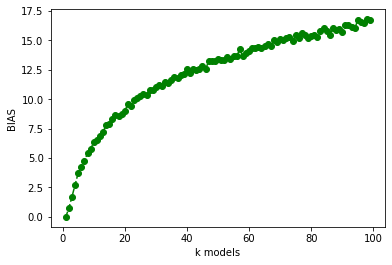

In [0]:
mu=4.71
sigma2=2.63
maxk=100

save_bias=[]
for k in range(1,maxk):
  save=[]
  for i in range(1,1000):
    modelmeans=np.random.normal(mu,np.sqrt(sigma2),k)
    #print(modelmeans)
    save.append(np.min(modelmeans))

  x=np.mean(save)
  y=np.var(save)
  bias=(x-mu)**2
  #print("%.2f %.2f %.2f " % (x,y,bias))
  save_bias.append(bias)
#print(save_bias)
plt.plot(range(1,maxk),save_bias,'go--');
plt.xlabel("k models");
plt.ylabel("BIAS");

When use more than approx. 20 models, the bias becomes of the same size or even greater than the absolute values of validation losses from the previous problem.

# Problem 3

In [0]:
from PIL import Image
myImage = Image.open("pic.png");

In [0]:
!pip install pillow

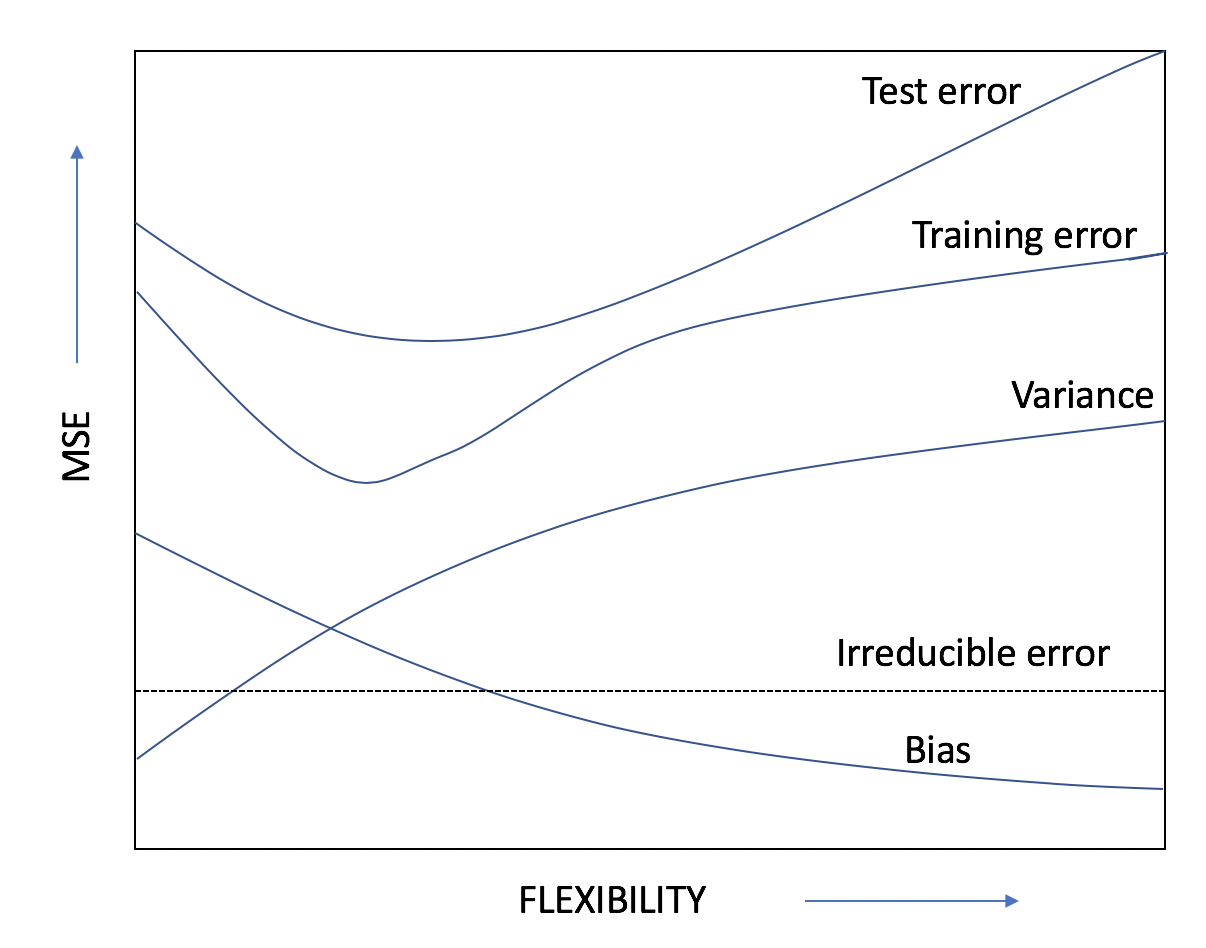

In [0]:
myImage

## Problem 4

Task:
Show that the loss on validation set is an unbiased estimate of the loss on the test data.

We want to show that
\begin{align}
  \text{Bias of }MSE_{val} = E\big((MSE_{val} - MSE_{test})^2\big)  = 0, 
\end{align}

where $MSE = \frac{1}{N}\sum_{i=1}^{N} ((y_i-\hat{y_i})^2)$.

The validation set has $n-m$ items and the training data has $n$ items. The items are i.i.d. 

\begin{align}
\text{Bias of }MSE_{val} &= E\big((MSE_{val} - MSE_{test})^2\big)  \\
 &= E\big(MSE_{val}^2 - 2 * MSE_{val}MSE_{test} + MSE_{test}^2\big)  \\
 &= E\Bigg(\Big(\frac{1}{n-m}\sum_{i=1}^{n-m} ((y_i-\hat{y_i})^2))\Big)^2 - \frac{2}{n*(n-m)}\sum_{i=1}^{n-m} ((y_i-\hat{y_i})^2)\sum_{i=1}^{n} ((y_i-\hat{y_i})^2) + \Big(\frac{1}{n}\sum_{i=1}^{n} ((y_i-\hat{y_i})^2)\Big)^2\Bigg)  \\
 &= E\Big(\frac{1}{n-m}\sum_{i=1}^{n-m} ((y_i-\hat{y_i})^2))\Big)^2 - E\Big(\frac{2}{n*(n-m)}\sum_{i=1}^{n-m} ((y_i-\hat{y_i})^2)\sum_{i=1}^{n} ((y_i-\hat{y_i})^2)\Big) + E\Big(\frac{1}{n}\sum_{i=1}^{n} ((y_i-\hat{y_i})^2)\Big)^2 \\
 &= \Big(\frac{1}{n-m}\sum_{i=1}^{n-m} E((y_i-\hat{y_i})^2))\Big)^2 - \Big(\frac{2}{n*(n-m)}\sum_{i=1}^{n-m} E((y_i-\hat{y_i})^2)\sum_{i=1}^{n} E((y_i-\hat{y_i})^2)\Big) + \Big(\frac{1}{n}\sum_{i=1}^{n} E((y_i-\hat{y_i})^2)\Big)^2 \\
 &= \Big(\frac{n-m}{n-m} E((y_i-\hat{y_i})^2))\Big)^2 - \Big(\frac{2*n*(n-m)}{n*(n-m)} E((y_i-\hat{y_i})^2) E((y_i-\hat{y_i})^2)\Big) + \Big(\frac{n}{n} E((y_i-\hat{y_i})^2)\Big)^2 \\
 &= E((y_i-\hat{y_i})^2))^2 - 2*E((y_i-\hat{y_i})^2) E((y_i-\hat{y_i})^2) + E((y_i-\hat{y_i})^2)^2 \\
 &= 2*E((y_i-\hat{y_i})^2))^2 - 2*E((y_i-\hat{y_i})^2)^2 \\
 &= 0
\end{align}


